In [55]:
import polars as pl
import matplotlib.pyplot as plt

# Picnic Basket analysis

In [56]:
# read csv file into a polars dataframe
df = pl.read_csv("round-3-island-data-bottle\prices_round_3_day_2.csv", separator=";")
df

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Henry\AppData\Local\Temp\ipykernel_21748\2220390570.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = pl.read_csv("round-3-island-data-bottle\prices_round_3_day_2.csv", separator=";")


day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64
2,0,"""PICNIC_BASKET2""",30094,11,30093,27,null,null,30099,1,30100,37,null,null,30096.5,0.0
2,0,"""VOLCANIC_ROCK_VOUCHER_9750""",469,11,null,null,null,null,470,11,null,null,null,null,469.5,0.0
2,0,"""RAINFOREST_RESIN""",9992,35,null,null,null,null,10008,35,null,null,null,null,10000.0,0.0
2,0,"""VOLCANIC_ROCK_VOUCHER_9500""",718,11,null,null,null,null,719,11,null,null,null,null,718.5,0.0
2,0,"""VOLCANIC_ROCK""",10218,150,10217,64,null,null,10219,150,10220,64,null,null,10218.5,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,999900,"""PICNIC_BASKET2""",30073,1,30072,39,null,null,30078,20,30079,20,null,null,30075.5,0.0
2,999900,"""VOLCANIC_ROCK_VOUCHER_9750""",417,20,null,null,null,null,418,20,null,null,null,null,417.5,0.0
2,999900,"""PICNIC_BASKET1""",58422,1,58421,39,null,null,58432,20,58433,20,null,null,58427.0,0.0


In [57]:
# Pivot the dataframe to wide format
result = df.pivot(
    index="timestamp",
    columns="product",
    values="mid_price",
    aggregate_function="first",  # In case of duplicates, take the first value
)

result = result.with_columns(
    (
        pl.col("PICNIC_BASKET1")
        - (6 * pl.col("CROISSANTS") + 3 * pl.col("JAMS") + pl.col("DJEMBES"))
    ).alias("basket1_spread"),
    (pl.col("PICNIC_BASKET2") - (4 * pl.col("CROISSANTS") + 2 * pl.col("JAMS"))).alias(
        "basket2_spread"
    ),
)
result

C:\Users\Henry\AppData\Local\Temp\ipykernel_21748\2165089164.py:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  result = df.pivot(


timestamp,PICNIC_BASKET2,VOLCANIC_ROCK_VOUCHER_9750,RAINFOREST_RESIN,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK,SQUID_INK,VOLCANIC_ROCK_VOUCHER_10250,KELP,DJEMBES,CROISSANTS,JAMS,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10500,PICNIC_BASKET1,basket1_spread,basket2_spread
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,30096.5,469.5,10000.0,718.5,10218.5,1800.5,63.5,2045.5,13419.5,4265.5,6519.5,233.5,8.5,58707.0,136.0,-4.5
100,30097.5,469.0,9995.5,718.0,10217.5,1801.0,62.5,2045.0,13419.5,4265.5,6520.0,234.5,8.5,58712.0,139.5,-4.5
200,30094.5,473.5,10000.0,722.5,10222.0,1803.5,64.5,2046.5,13419.5,4265.5,6519.5,235.5,9.5,58715.5,144.5,-6.5
300,30095.5,474.5,10000.0,723.5,10223.0,1802.5,65.5,2045.5,13419.5,4265.5,6519.5,235.5,9.5,58716.5,145.5,-5.5
400,30099.5,468.5,10000.0,717.5,10217.0,1801.5,62.5,2045.5,13419.5,4266.5,6519.5,234.5,8.5,58715.5,138.5,-5.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
999500,30073.0,418.5,10000.0,668.0,10168.0,1823.0,36.5,2041.0,13296.5,4239.5,6526.0,182.5,3.5,58410.5,99.0,63.0
999600,30069.0,418.5,9997.5,667.5,10167.0,1823.0,36.5,2041.0,13295.5,4239.5,6526.0,184.5,3.5,58415.5,105.0,59.0
999700,30069.0,418.5,10000.0,667.5,10167.0,1823.5,36.5,2041.5,13295.5,4239.5,6526.0,182.5,3.5,58415.0,104.5,59.0


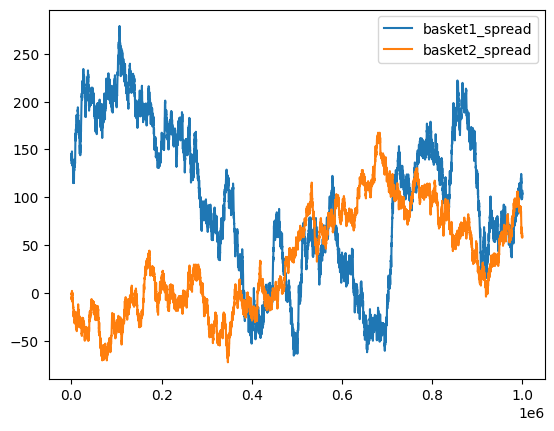

In [58]:
plt.plot(
    result["timestamp"].to_numpy(),
    result["basket1_spread"].to_numpy(),
    label="basket1_spread",
)
plt.plot(
    result["timestamp"].to_numpy(),
    result["basket2_spread"].to_numpy(),
    label="basket2_spread",
)
plt.legend()
plt.show()

79.23442485628156
54.20366645703719


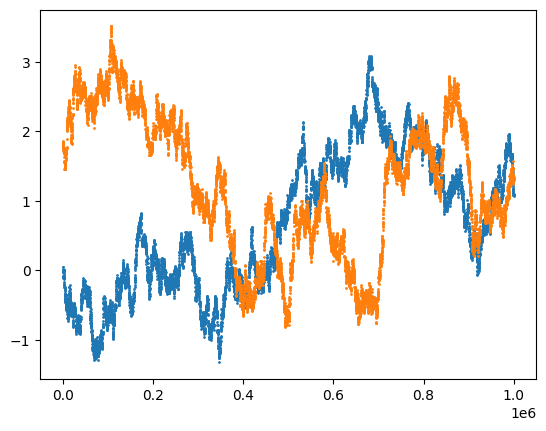

In [59]:
# calculate z-scores with sliding window
window = 10000
result = result.with_columns(
    (pl.col("basket1_spread") / (pl.col("basket1_spread").std())).alias(
        "basket1_z_score"
    ),
    (pl.col("basket2_spread") / (pl.col("basket2_spread").std())).alias(
        "basket2_z_score"
    ),
)

plt.scatter(
    result["timestamp"].to_numpy(),
    result["basket2_z_score"].to_numpy(),
    label="basket2_z_score",
    s=1,
)
plt.scatter(
    result["timestamp"].to_numpy(),
    result["basket1_z_score"].to_numpy(),
    label="basket1_z_score",
    s=1,
)

print(result["basket1_spread"].std())
print(result["basket2_spread"].std())